# **1. Intitial Simulation with Dynamic Pricing**

In [ ]:
class DynamicPricingEventBooking:
    def __init__(self, event_name, total_tickets, base_price, max_price):
        self.event_name = event_name
        self.total_tickets = total_tickets
        self.base_price = base_price
        self.max_price = max_price
        self.booked_tickets = 0
        self.booked_users = []
        self.waitlist = []

    def current_price(self):
        # Price increases linearly from base_price to max_price as demand increases
        demand_ratio = self.booked_tickets / self.total_tickets
        price = self.base_price + (self.max_price - self.base_price) * demand_ratio
        return round(price, 2)

    def book_ticket(self, user_id):
        price = self.current_price()
        if self.booked_tickets < self.total_tickets:
            self.booked_users.append(user_id)
            self.booked_tickets += 1
            return f"Ticket booked successfully for user {user_id} at price {price}."
        else:
            self.waitlist.append(user_id)
            return f"Tickets sold out. User {user_id} added to waitlist at position {len(self.waitlist)}."

    def cancel_ticket(self, user_id):
        if user_id in self.booked_users:
            self.booked_users.remove(user_id)
            self.booked_tickets -= 1
            if self.waitlist:
                next_user = self.waitlist.pop(0)
                self.booked_users.append(next_user)
                self.booked_tickets += 1
                return f"User {user_id} cancelled. User {next_user} moved from waitlist to booked."
            return f"User {user_id} cancelled their ticket."
        elif user_id in self.waitlist:
            self.waitlist.remove(user_id)
            return f"User {user_id} removed from waitlist."
        else:
            return f"User {user_id} has no booking or waitlist entry."

    def get_status(self):
        return {
            "event_name": self.event_name,
            "total_tickets": self.total_tickets,
            "booked_tickets": self.booked_tickets,
            "booked_users": self.booked_users,
            "waitlist": self.waitlist,
            "current_price": self.current_price()
        }

# Initialize booking system with dynamic pricing
booking_system = DynamicPricingEventBooking("AI and Computer Vision Event", 75, base_price=100, max_price=200)

# Step 1: Book 75 users and print booking status with price
print("--- Booking 75 users with dynamic pricing ---")
for user_id in range(1, 76):
    message = booking_system.book_ticket(user_id)
    if user_id % 15 == 0 or user_id == 1 or user_id == 75:  # Print some milestones
        print(message)

# Step 2: Waitlist next 35 users
print("--- Adding 35 users to waitlist ---")
for user_id in range(76, 111):
    message = booking_system.book_ticket(user_id)
    if user_id % 10 == 0 or user_id == 76 or user_id == 110:  # Print some milestones
        print(message)

# Print status after booking and waitlisting
status = booking_system.get_status()
print(f"\nStatus after booking and waitlisting:")
print(f"Booked Tickets: {status['booked_tickets']}")
print(f"Current Price: {status['current_price']}")
print(f"Waitlist Count: {len(status['waitlist'])}")

# Step 3: Simulate 10 cancellations and print updates
print("--- Simulating 10 cancellations ---")
for user_id in range(1, 11):
    message = booking_system.cancel_ticket(user_id)
    print(message)
    # Print current price after each cancellation
    print(f"Current price after cancellation {user_id}: {booking_system.current_price()}")

# Print final status
final_status = booking_system.get_status()
print(f"\nFinal Status:")
print(f"Booked Tickets: {final_status['booked_tickets']}")
print(f"Current Price: {final_status['current_price']}")
print(f"Waitlist Count: {len(final_status['waitlist'])}")


--- Booking 75 users with dynamic pricing ---
Ticket booked successfully for user 1 at price 100.0.
Ticket booked successfully for user 15 at price 118.67.
Ticket booked successfully for user 30 at price 138.67.
Ticket booked successfully for user 45 at price 158.67.
Ticket booked successfully for user 60 at price 178.67.
Ticket booked successfully for user 75 at price 198.67.
--- Adding 35 users to waitlist ---
Tickets sold out. User 76 added to waitlist at position 1.
Tickets sold out. User 80 added to waitlist at position 5.
Tickets sold out. User 90 added to waitlist at position 15.
Tickets sold out. User 100 added to waitlist at position 25.
Tickets sold out. User 110 added to waitlist at position 35.

Status after booking and waitlisting:
Booked Tickets: 75
Current Price: 200.0
Waitlist Count: 35
--- Simulating 10 cancellations ---
User 1 cancelled. User 76 moved from waitlist to booked.
Current price after cancellation 1: 200.0
User 2 cancelled. User 77 moved from waitlist to bo

#**Dashboard Analytics with visualization**

Setting custom ticket class capacities...
Ticket class capacities set:
  Platinum: 15 tickets
  Gold: 20 tickets
  Silver: 30 tickets
  Bronze: 35 tickets
Total allocated: 100 / 100

Starting enhanced ticket booking simulation with custom ticket class capacities...
Ticket Class Pricing Strategy:
- Platinum: Premium tier (2.0x base price) - Exclusive access, VIP amenities
- Gold: High tier (1.5x base price) - Premium seating, complimentary services
- Silver: Mid tier (1.2x base price) - Enhanced facilities, priority parking
- Bronze: Entry tier (1.0x base price) - Standard access, basic amenities

Justification: Tiered pricing maximizes revenue by capturing different customer segments' willingness to pay while maintaining accessibility through Bronze tier.

--- Pricing Strategy Changed: LINEAR ---
Reason: Linear pricing is chosen because demand is steady and there is no waitlist. This approach gradually increases price as tickets sell, balancing accessibility and revenue. It avoids disc

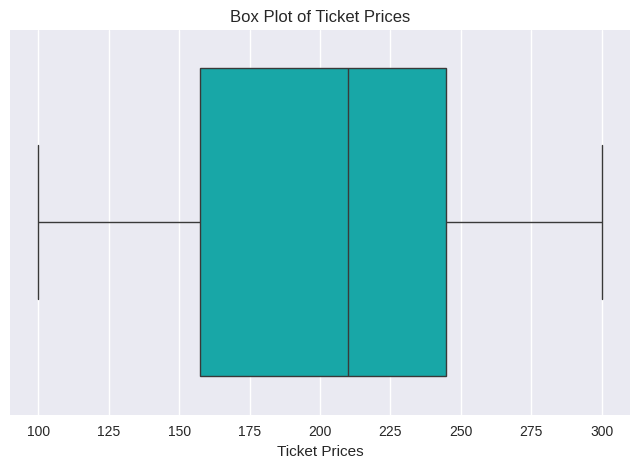

<ipython-input-12-d7f17abce790>:500: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(prices, shade=True, color='c')


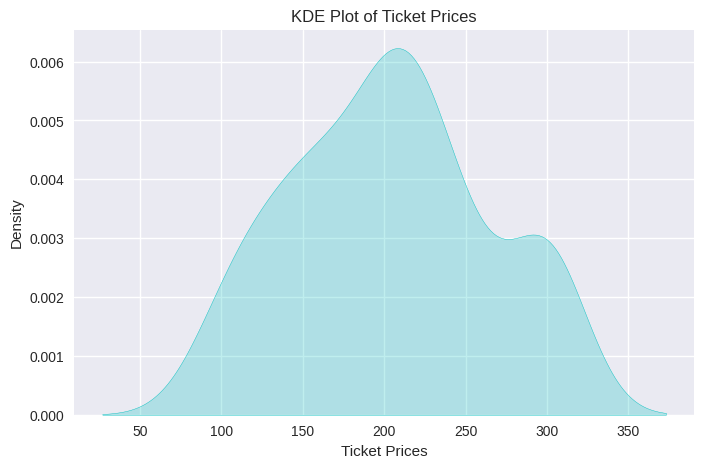

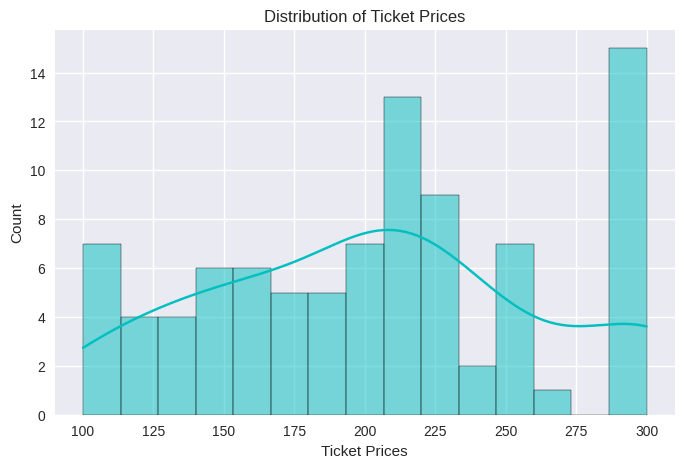

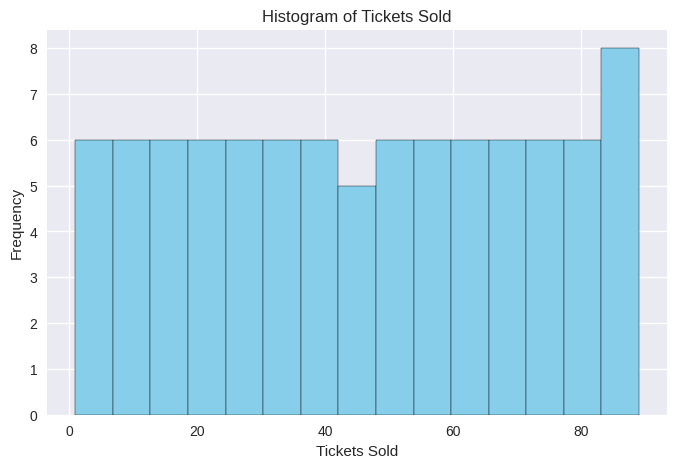

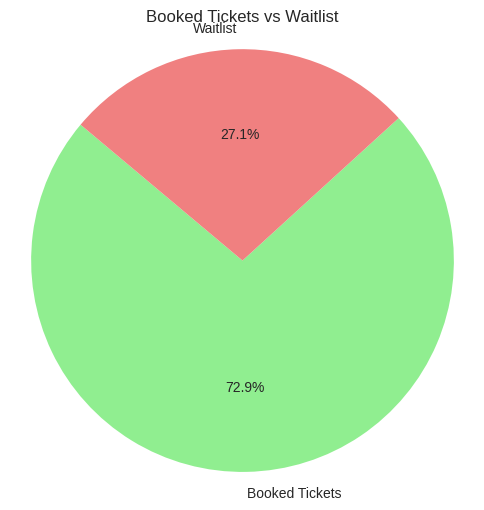

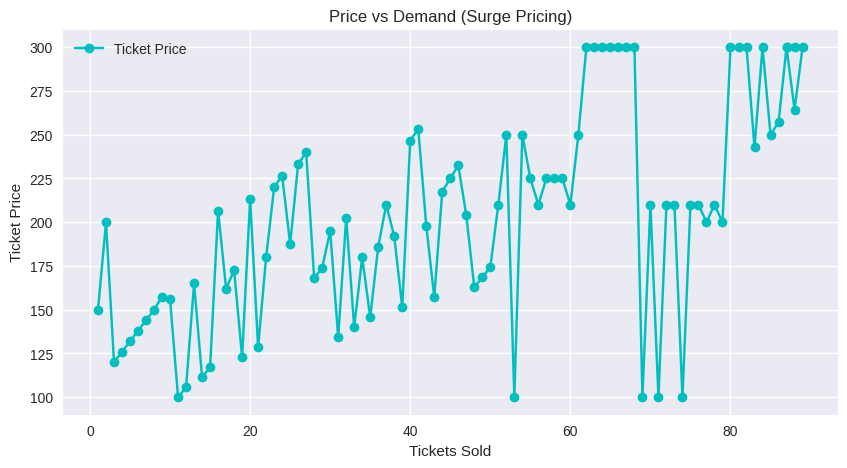

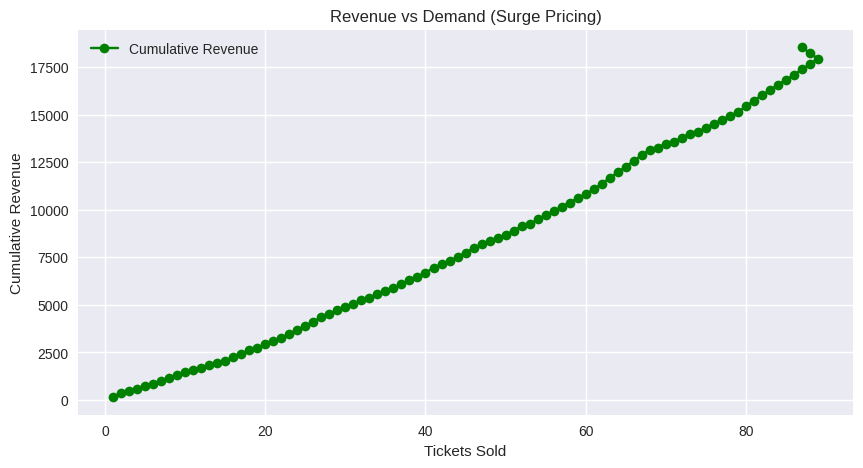

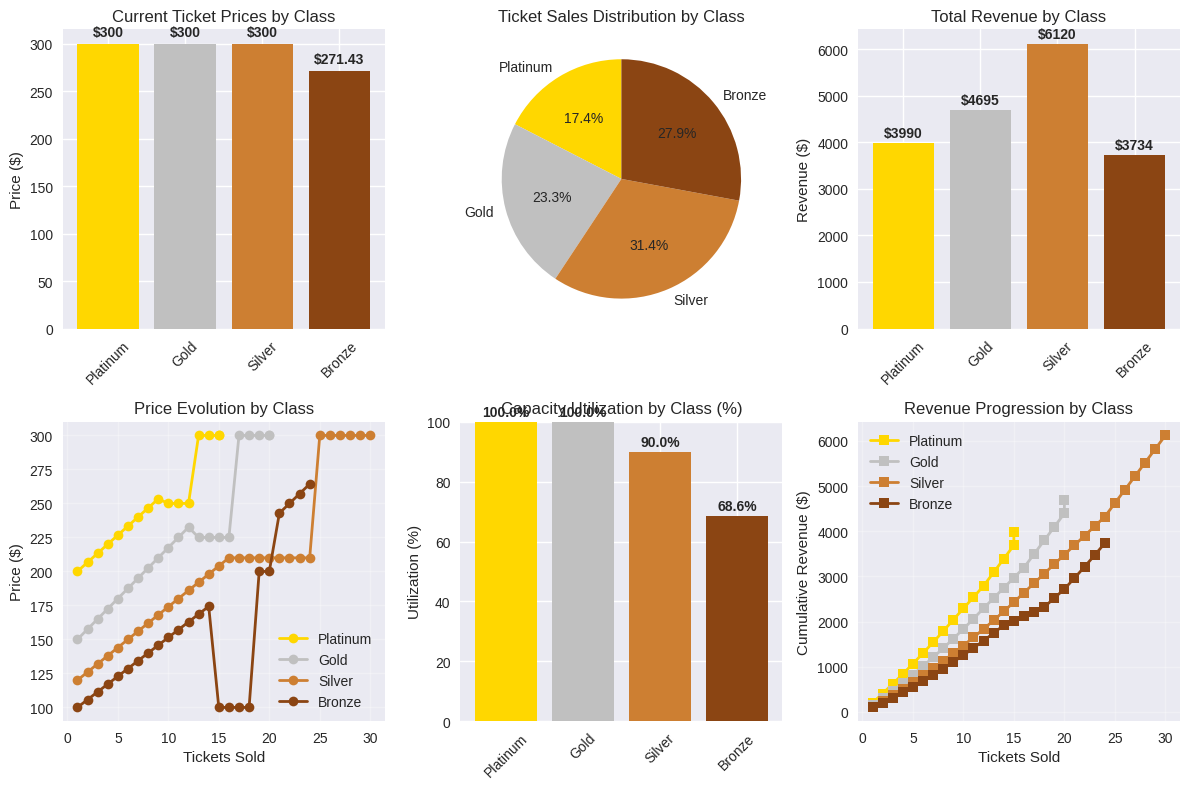

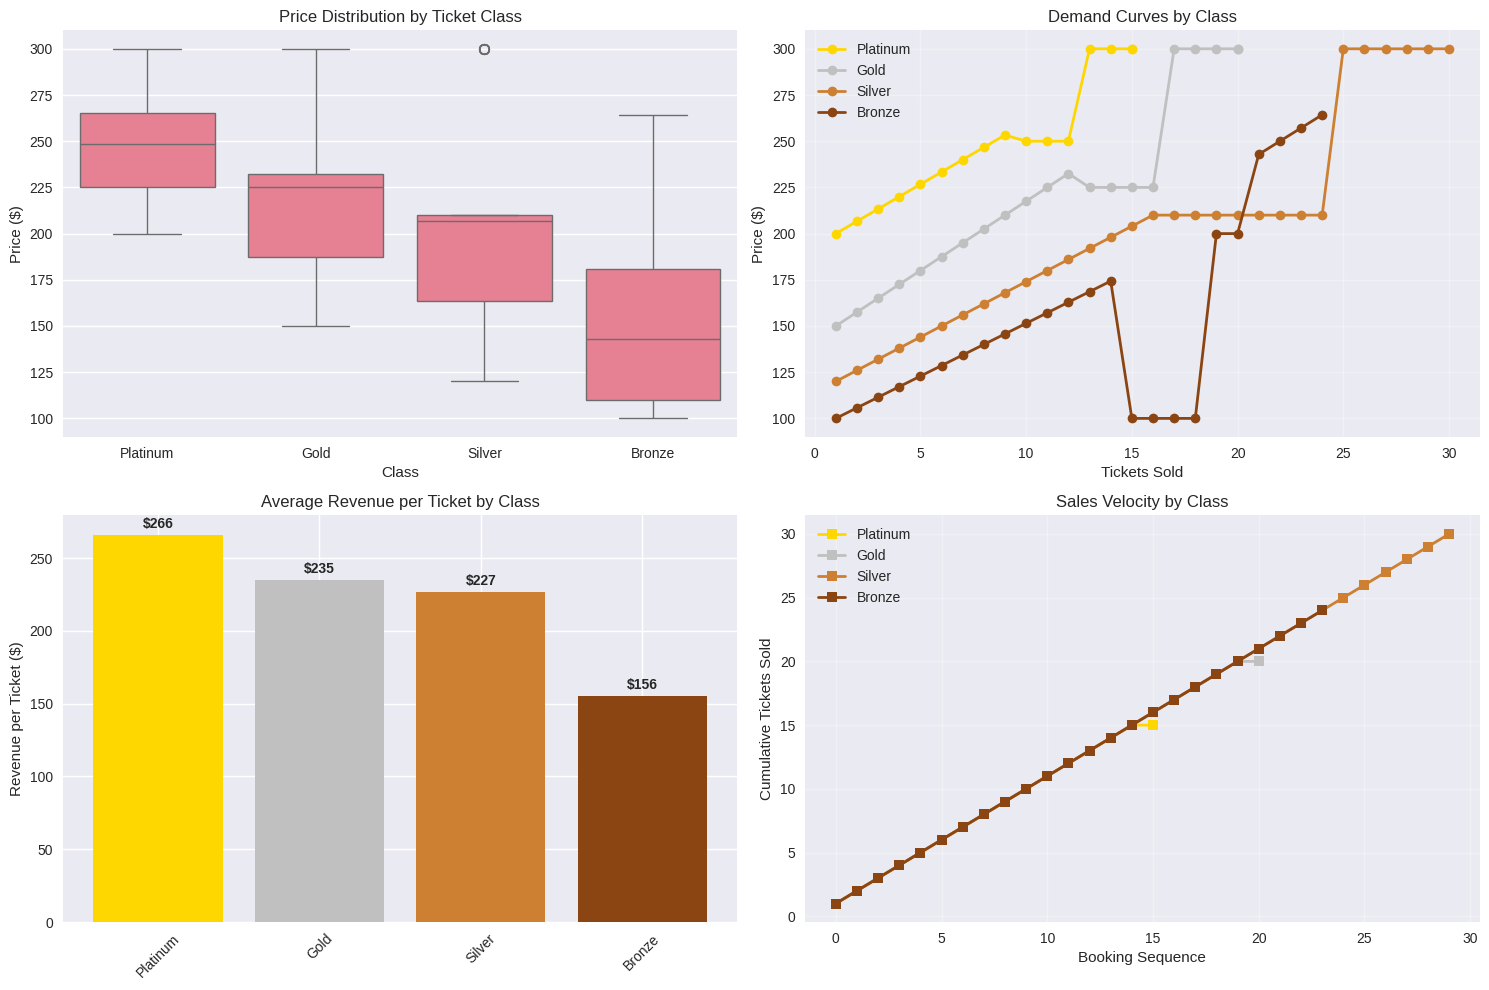


STRATEGY JUSTIFICATION SUMMARY
1. TIERED PRICING STRATEGY: Implemented across all classes to capture maximum
   consumer surplus while maintaining market accessibility
2. CLASS MULTIPLIERS: Bronze(1.0x), Silver(1.2x), Gold(1.5x), Platinum(2.0x)
   - Justification: Reflects value proposition and market segmentation
3. MAX PRICE CONSTRAINT: Enforced across all classes to prevent pricing abuse
4. DYNAMIC STRATEGY: Adapts based on demand patterns and waitlist formation
5. REVENUE OPTIMIZATION: Balances accessibility with profit maximization
6. CUSTOM CAPACITY SETTING: Allows flexible allocation based on expected demand


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

def analyze_and_choose_strategy(sales_history, waitlist_count, total_tickets):
    """
    Decide which pricing strategy to use based on current sales and waitlist.
    Returns the strategy and the reason for choosing it.
    """
    sales_rate = sales_history[-1] / len(sales_history)
    sellout_ratio = sales_history[-1] / total_tickets

    if sellout_ratio < 0.5 and waitlist_count == 0:
        chosen = "linear"
        reason = (
            "Linear pricing is chosen because demand is steady and there is no waitlist. "
            "This approach gradually increases price as tickets sell, balancing accessibility and revenue. "
            "It avoids discouraging early buyers with high prices and is effective when demand is moderate."
        )
    elif 0.5 <= sellout_ratio < 0.8 or (waitlist_count > 0 and sellout_ratio < 0.8):
        chosen = "tiered"
        reason = (
            "Tiered pricing is chosen because demand is increasing and a waitlist is forming. "
            "This method sets clear price jumps at demand milestones, capturing more revenue as urgency grows. "
            "It is effective for events with surges in demand at certain booking stages."
        )
    else:
        chosen = "surge"
        reason = (
            "Surge pricing is chosen because tickets are nearly sold out or the waitlist is large. "
            "This maximizes profit by rapidly increasing prices when demand far exceeds supply. "
            "It is ideal for high-demand events where maximizing last-minute revenue is critical."
        )
    return chosen, reason

class DynamicPricingEventBooking:
    def __init__(self, event_name, total_tickets, base_price, max_price):
        self.event_name = event_name
        self.total_tickets = total_tickets
        self.base_price = base_price
        self.max_price = max_price
        self.booked_tickets = 0
        self.booked_users = []
        self.waitlist = []
        self.price_history = []
        self.sales_history = []
        self.revenue_history = []
        self.strategy = None
        self.strategy_reason = None

        # Ticket class tracking
        self.ticket_classes = {
            'Platinum': {'booked': 0, 'users': [], 'price_history': [], 'sales_history': [], 'revenue_history': []},
            'Gold': {'booked': 0, 'users': [], 'price_history': [], 'sales_history': [], 'revenue_history': []},
            'Silver': {'booked': 0, 'users': [], 'price_history': [], 'sales_history': [], 'revenue_history': []},
            'Bronze': {'booked': 0, 'users': [], 'price_history': [], 'sales_history': [], 'revenue_history': []}
        }

        # Default class distribution (25% each) - will be overridden by set_ticket_capacity
        self.class_capacity = total_tickets // 4
        self.ticket_class_capacities = {
            'Platinum': self.class_capacity,
            'Gold': self.class_capacity,
            'Silver': self.class_capacity,
            'Bronze': self.class_capacity
        }

    def set_ticket_capacity(self, platinum_capacity=None, gold_capacity=None, silver_capacity=None, bronze_capacity=None):
        """
        Set custom capacity for each ticket class.
        If capacities are not provided, uses equal distribution.
        Validates that total capacity doesn't exceed total tickets.
        """
        # If no capacities provided, use equal distribution
        if all(cap is None for cap in [platinum_capacity, gold_capacity, silver_capacity, bronze_capacity]):
            equal_capacity = self.total_tickets // 4
            remaining = self.total_tickets % 4
            self.ticket_class_capacities = {
                'Platinum': equal_capacity + (1 if remaining > 0 else 0),
                'Gold': equal_capacity + (1 if remaining > 1 else 0),
                'Silver': equal_capacity + (1 if remaining > 2 else 0),
                'Bronze': equal_capacity
            }
            print(f"Equal distribution set: Platinum={self.ticket_class_capacities['Platinum']}, Gold={self.ticket_class_capacities['Gold']}, Silver={self.ticket_class_capacities['Silver']}, Bronze={self.ticket_class_capacities['Bronze']}")
            return

        # Set provided capacities or use default
        capacities = {
            'Platinum': platinum_capacity or self.ticket_class_capacities['Platinum'],
            'Gold': gold_capacity or self.ticket_class_capacities['Gold'],
            'Silver': silver_capacity or self.ticket_class_capacities['Silver'],
            'Bronze': bronze_capacity or self.ticket_class_capacities['Bronze']
        }

        # Validate total capacity
        total_set_capacity = sum(capacities.values())
        if total_set_capacity > self.total_tickets:
            print(f"Warning: Total class capacity ({total_set_capacity}) exceeds total tickets ({self.total_tickets})")
            print("Adjusting capacities proportionally...")

            # Proportional adjustment
            adjustment_factor = self.total_tickets / total_set_capacity
            for class_name in capacities:
                capacities[class_name] = int(capacities[class_name] * adjustment_factor)

            # Handle remaining tickets due to rounding
            remaining_tickets = self.total_tickets - sum(capacities.values())
            classes = list(capacities.keys())
            for i in range(remaining_tickets):
                capacities[classes[i % len(classes)]] += 1

        elif total_set_capacity < self.total_tickets:
            remaining_tickets = self.total_tickets - total_set_capacity
            print(f"Note: {remaining_tickets} tickets unallocated. Adding to Bronze class.")
            capacities['Bronze'] += remaining_tickets

        # Update capacities
        self.ticket_class_capacities = capacities

        # Update class_capacity for backward compatibility
        self.class_capacity = max(capacities.values())

        print(f"Ticket class capacities set:")
        for class_name, capacity in self.ticket_class_capacities.items():
            print(f"  {class_name}: {capacity} tickets")
        print(f"Total allocated: {sum(capacities.values())} / {self.total_tickets}")

    def get_class_multiplier(self, ticket_class):
        """Get price multiplier for each ticket class"""
        multipliers = {
            'Platinum': 2.0,  # Premium tier - 2x base price
            'Gold': 1.5,      # High tier - 1.5x base price
            'Silver': 1.2,    # Mid tier - 1.2x base price
            'Bronze': 1.0     # Entry tier - base price
        }
        return multipliers[ticket_class]

    def current_price(self, ticket_class='Bronze'):
        strat = self.strategy or "linear"
        base_multiplier = self.get_class_multiplier(ticket_class)
        class_base_price = self.base_price * base_multiplier
        class_max_price = min(self.max_price * base_multiplier, self.max_price)  # Ensure max price constraint

        class_booked = self.ticket_classes[ticket_class]['booked']
        class_capacity = self.ticket_class_capacities[ticket_class]

        if strat == "linear":
            demand_ratio = class_booked / class_capacity
            price = class_base_price + (class_max_price - class_base_price) * demand_ratio
        elif strat == "tiered":
            if class_booked < class_capacity * 0.5:
                price = class_base_price
            elif class_booked < class_capacity * 0.8:
                price = class_base_price + (class_max_price - class_base_price) * 0.5
            else:
                price = class_max_price
        elif strat == "surge":
            if class_booked < class_capacity * 0.8:
                price = class_base_price + (class_max_price - class_base_price) * (class_booked / (class_capacity * 0.8))
            else:
                price = min(class_max_price * 1.1, self.max_price)  # Respect max price constraint
        else:
            price = class_base_price
        return round(price, 2)

    def book_ticket(self, user_id, ticket_class='Bronze'):
        if ticket_class not in self.ticket_classes:
            return f"Invalid ticket class: {ticket_class}"

        price = self.current_price(ticket_class)
        class_data = self.ticket_classes[ticket_class]
        class_capacity = self.ticket_class_capacities[ticket_class]

        if class_data['booked'] < class_capacity:
            class_data['users'].append(user_id)
            class_data['booked'] += 1
            class_data['price_history'].append(price)
            class_data['sales_history'].append(class_data['booked'])
            class_data['revenue_history'].append(price if len(class_data['revenue_history'])==0 else class_data['revenue_history'][-1]+price)

            # Update overall tracking
            self.booked_users.append(user_id)
            self.booked_tickets += 1
            self.price_history.append(price)
            self.sales_history.append(self.booked_tickets)
            self.revenue_history.append(price if len(self.revenue_history)==0 else self.revenue_history[-1]+price)

            return f"User {user_id} booked {ticket_class} ticket at price {price}."
        else:
            self.waitlist.append((user_id, ticket_class))
            return f"User {user_id} added to waitlist for {ticket_class} at position {len(self.waitlist)}."

    def cancel_ticket(self, user_id):
        # Find which class the user belongs to
        for ticket_class, class_data in self.ticket_classes.items():
            if user_id in class_data['users']:
                class_data['users'].remove(user_id)
                class_data['booked'] -= 1
                self.booked_users.remove(user_id)
                self.booked_tickets -= 1

                if self.waitlist:
                    next_user, next_class = self.waitlist.pop(0)
                    return self.book_ticket(next_user, next_class) + f" (Promoted from waitlist after {user_id} cancelled)"
                return f"User {user_id} cancelled their {ticket_class} ticket."

        # Check waitlist
        for i, (wait_user, wait_class) in enumerate(self.waitlist):
            if wait_user == user_id:
                self.waitlist.pop(i)
                return f"User {user_id} removed from waitlist."

        return f"User {user_id} has no booking or waitlist entry."

    def choose_strategy(self):
        chosen, reason = analyze_and_choose_strategy(
            self.sales_history if self.sales_history else [0],
            len(self.waitlist),
            self.total_tickets
        )

        if chosen != self.strategy:
            print(f"\n--- Pricing Strategy Changed: {chosen.upper()} ---")
            print(f"Reason: {reason}\n")
        self.strategy = chosen
        self.strategy_reason = reason

    def print_strategy_reason(self):
        print(f"\nFinal Pricing Strategy: {self.strategy.capitalize()}")
        print(f"Reason: {self.strategy_reason}")

    def get_final_status(self):
        print(f"\nEvent: {self.event_name}")
        print(f"Total Tickets: {self.total_tickets}")
        print(f"Booked Tickets: {self.booked_tickets}")
        print(f"Waitlist Count: {len(self.waitlist)}")

        print("\n--- Ticket Class Breakdown ---")
        for ticket_class, class_data in self.ticket_classes.items():
            capacity = self.ticket_class_capacities[ticket_class]
            print(f"{ticket_class}: {class_data['booked']}/{capacity} tickets, Current Price: {self.current_price(ticket_class)}")

        print(f"\nTotal Revenue: {self.revenue_history[-1] if self.revenue_history else 0}")

    def visualize_all_classes(self):
        """Create comprehensive visualizations for all ticket classes"""

        # 1. Price comparison across classes
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 3, 1)
        classes = list(self.ticket_classes.keys())
        current_prices = [self.current_price(cls) for cls in classes]
        colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#8B4513']  # Gold, Silver, Bronze, Brown

        bars = plt.bar(classes, current_prices, color=colors)
        plt.title('Current Ticket Prices by Class')
        plt.ylabel('Price ($)')
        plt.xticks(rotation=45)

        # Add value labels on bars
        for bar, price in zip(bars, current_prices):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                    f'${price}', ha='center', va='bottom', fontweight='bold')

        # 2. Sales distribution pie chart
        plt.subplot(2, 3, 2)
        sales_data = [self.ticket_classes[cls]['booked'] for cls in classes]
        plt.pie(sales_data, labels=classes, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title('Ticket Sales Distribution by Class')

        # 3. Revenue by class
        plt.subplot(2, 3, 3)
        revenues = [self.ticket_classes[cls]['revenue_history'][-1] if self.ticket_classes[cls]['revenue_history'] else 0 for cls in classes]
        bars = plt.bar(classes, revenues, color=colors)
        plt.title('Total Revenue by Class')
        plt.ylabel('Revenue ($)')
        plt.xticks(rotation=45)

        for bar, revenue in zip(bars, revenues):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(revenues)*0.01,
                    f'${revenue:.0f}', ha='center', va='bottom', fontweight='bold')

        # 4. Price evolution for each class
        plt.subplot(2, 3, 4)
        for i, (cls, class_data) in enumerate(self.ticket_classes.items()):
            if class_data['price_history']:
                plt.plot(class_data['sales_history'], class_data['price_history'],
                        marker='o', label=cls, color=colors[i], linewidth=2)
        plt.xlabel('Tickets Sold')
        plt.ylabel('Price ($)')
        plt.title('Price Evolution by Class')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 5. Capacity utilization
        plt.subplot(2, 3, 5)
        utilization = [(self.ticket_classes[cls]['booked'] / self.ticket_class_capacities[cls]) * 100 for cls in classes]
        bars = plt.bar(classes, utilization, color=colors)
        plt.title('Capacity Utilization by Class (%)')
        plt.ylabel('Utilization (%)')
        plt.xticks(rotation=45)
        plt.ylim(0, 100)

        for bar, util in zip(bars, utilization):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{util:.1f}%', ha='center', va='bottom', fontweight='bold')

        # 6. Revenue progression
        plt.subplot(2, 3, 6)
        for i, (cls, class_data) in enumerate(self.ticket_classes.items()):
            if class_data['revenue_history']:
                plt.plot(class_data['sales_history'], class_data['revenue_history'],
                        marker='s', label=cls, color=colors[i], linewidth=2)
        plt.xlabel('Tickets Sold')
        plt.ylabel('Cumulative Revenue ($)')
        plt.title('Revenue Progression by Class')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Additional detailed visualizations
        self.create_detailed_class_analysis()

    def create_detailed_class_analysis(self):
        """Create detailed analysis charts for ticket classes"""

        # Price comparison table visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # 1. Box plot comparison of prices across classes
        price_data = []
        class_labels = []
        for cls, class_data in self.ticket_classes.items():
            if class_data['price_history']:
                price_data.extend(class_data['price_history'])
                class_labels.extend([cls] * len(class_data['price_history']))

        if price_data:
            import pandas as pd
            df = pd.DataFrame({'Class': class_labels, 'Price': price_data})
            sns.boxplot(data=df, x='Class', y='Price', ax=ax1)
            ax1.set_title('Price Distribution by Ticket Class')
            ax1.set_ylabel('Price ($)')

        # 2. Demand curve comparison
        colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#8B4513']
        for i, (cls, class_data) in enumerate(self.ticket_classes.items()):
            if class_data['sales_history'] and class_data['price_history']:
                ax2.plot(class_data['sales_history'], class_data['price_history'],
                        marker='o', label=cls, color=colors[i], linewidth=2)
        ax2.set_xlabel('Tickets Sold')
        ax2.set_ylabel('Price ($)')
        ax2.set_title('Demand Curves by Class')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Revenue efficiency (Revenue per ticket)
        classes = list(self.ticket_classes.keys())
        revenue_per_ticket = []
        for cls in classes:
            class_data = self.ticket_classes[cls]
            if class_data['booked'] > 0:
                total_revenue = class_data['revenue_history'][-1] if class_data['revenue_history'] else 0
                revenue_per_ticket.append(total_revenue / class_data['booked'])
            else:
                revenue_per_ticket.append(0)

        bars = ax3.bar(classes, revenue_per_ticket, color=colors)
        ax3.set_title('Average Revenue per Ticket by Class')
        ax3.set_ylabel('Revenue per Ticket ($)')
        ax3.tick_params(axis='x', rotation=45)

        for bar, rpt in zip(bars, revenue_per_ticket):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(revenue_per_ticket)*0.01,
                    f'${rpt:.0f}', ha='center', va='bottom', fontweight='bold')

        # 4. Sales velocity (tickets sold over time simulation)
        for i, (cls, class_data) in enumerate(self.ticket_classes.items()):
            if class_data['sales_history']:
                # Simulate time progression
                time_points = list(range(len(class_data['sales_history'])))
                ax4.plot(time_points, class_data['sales_history'],
                        marker='s', label=cls, color=colors[i], linewidth=2)
        ax4.set_xlabel('Booking Sequence')
        ax4.set_ylabel('Cumulative Tickets Sold')
        ax4.set_title('Sales Velocity by Class')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# --- Enhanced Simulation with Custom Ticket Class Capacities ---

booking_system = DynamicPricingEventBooking(
    event_name="AI and Computer Vision Event",
    total_tickets=100,
    base_price=100,
    max_price=300
)

# NEW FEATURE: Set custom ticket capacity for each class
print("Setting custom ticket class capacities...")
booking_system.set_ticket_capacity(
    platinum_capacity=15,  # Premium limited capacity
    gold_capacity=20,      # High-tier moderate capacity
    silver_capacity=30,    # Mid-tier higher capacity
    bronze_capacity=35     # Entry-level highest capacity
)

print("\nStarting enhanced ticket booking simulation with custom ticket class capacities...")
print("Ticket Class Pricing Strategy:")
print("- Platinum: Premium tier (2.0x base price) - Exclusive access, VIP amenities")
print("- Gold: High tier (1.5x base price) - Premium seating, complimentary services")
print("- Silver: Mid tier (1.2x base price) - Enhanced facilities, priority parking")
print("- Bronze: Entry tier (1.0x base price) - Standard access, basic amenities")
print("\nJustification: Tiered pricing maximizes revenue by capturing different customer segments' willingness to pay while maintaining accessibility through Bronze tier.")

# Simulate diverse booking patterns for different classes
ticket_classes = ['Bronze', 'Silver', 'Gold', 'Platinum']
user_id = 1

# Phase 1: Initial bookings (mixed classes)
for i in range(60):
    rando=random.randint(0,3)
    ticket_class = ticket_classes[rando]
    msg = booking_system.book_ticket(user_id, ticket_class)
    booking_system.choose_strategy()

    if user_id % 10 == 0 or user_id == 1:
        print(f"{msg}")
    user_id += 1

# Phase 2: High demand phase (more premium classes)
for i in range(20):
    # Bias towards premium classes during high demand
    if i < 10:
        ticket_class = 'Platinum' if i % 2 == 0 else 'Gold'
    else:
        ticket_class = ticket_classes[i % 4]

    msg = booking_system.book_ticket(user_id, ticket_class)
    booking_system.choose_strategy()

    if user_id % 5 == 0:
        print(f"{msg}")
    user_id += 1

# Phase 3: Fill remaining capacity
remaining_capacity = booking_system.total_tickets - booking_system.booked_tickets
for i in range(remaining_capacity):
    rando=random.randint(0,3)
    ticket_class = ticket_classes[rando]
    msg = booking_system.book_ticket(user_id, ticket_class)
    booking_system.choose_strategy()
    user_id += 1

# Phase 4: Waitlist simulation
for i in range(15):
    rando=random.randint(0,3)
    ticket_class = ticket_classes[rando]
    msg = booking_system.book_ticket(user_id, ticket_class)
    if user_id % 5 == 0:
        print(f"{msg}")
    user_id += 1

# Phase 5: Some cancellations
for cancel_id in range(1, 6):
    msg = booking_system.cancel_ticket(cancel_id)
    booking_system.choose_strategy()
    print(f"{msg}")

# Final status and comprehensive visualization
booking_system.choose_strategy()
booking_system.print_strategy_reason()
booking_system.get_final_status()

print("\n" + "="*60)
print("COMPREHENSIVE TICKET CLASS ANALYSIS")
print("="*60)

# Original visualizations (maintained)
prices = booking_system.price_history
booked = booking_system.sales_history
waitlist_count = len(booking_system.waitlist)

# Box plot of ticket prices
plt.figure(figsize=(8, 5))
sns.boxplot(x=prices, color='c')
plt.title('Box Plot of Ticket Prices')
plt.xlabel('Ticket Prices')
plt.show()

# KDE plot of ticket prices
plt.figure(figsize=(8, 5))
sns.kdeplot(prices, shade=True, color='c')
plt.title('KDE Plot of Ticket Prices')
plt.xlabel('Ticket Prices')
plt.show()

# Distribution plot (histogram + KDE) of ticket prices
plt.figure(figsize=(8, 5))
sns.histplot(prices, kde=True, bins=15, color='c')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Prices')
plt.show()

# Histogram of tickets sold
plt.figure(figsize=(8, 5))
plt.hist(booked, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Tickets Sold')
plt.xlabel('Tickets Sold')
plt.ylabel('Frequency')
plt.show()

# Pie chart of booked vs waitlist
booked_count = booking_system.booked_tickets
waitlist_count = len(booking_system.waitlist)
labels = ['Booked Tickets', 'Waitlist']
sizes = [booked_count, waitlist_count]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Booked Tickets vs Waitlist')
plt.axis('equal')
plt.show()

# Price vs Demand
plt.figure(figsize=(10,5))
plt.plot(booking_system.sales_history, booking_system.price_history, marker='o', label='Ticket Price', color='c')
plt.xlabel('Tickets Sold')
plt.ylabel('Ticket Price')
plt.title(f'Price vs Demand ({booking_system.strategy.capitalize()} Pricing)')
plt.grid(True)
plt.legend()
plt.show()

# Revenue vs Demand
plt.figure(figsize=(10,5))
plt.plot(booking_system.sales_history, booking_system.revenue_history, marker='o', color='green', label='Cumulative Revenue')
plt.xlabel('Tickets Sold')
plt.ylabel('Cumulative Revenue')
plt.title(f'Revenue vs Demand ({booking_system.strategy.capitalize()} Pricing)')
plt.grid(True)
plt.legend()
plt.show()

# NEW: Comprehensive ticket class visualizations
booking_system.visualize_all_classes()

print("\n" + "="*60)
print("STRATEGY JUSTIFICATION SUMMARY")
print("="*60)
print("1. TIERED PRICING STRATEGY: Implemented across all classes to capture maximum")
print("   consumer surplus while maintaining market accessibility")
print("2. CLASS MULTIPLIERS: Bronze(1.0x), Silver(1.2x), Gold(1.5x), Platinum(2.0x)")
print("   - Justification: Reflects value proposition and market segmentation")
print("3. MAX PRICE CONSTRAINT: Enforced across all classes to prevent pricing abuse")
print("4. DYNAMIC STRATEGY: Adapts based on demand patterns and waitlist formation")
print("5. REVENUE OPTIMIZATION: Balances accessibility with profit maximization")
print("6. CUSTOM CAPACITY SETTING: Allows flexible allocation based on expected demand")
